## Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [2]:
from src.fit_model import FitModel
from src.split_data import SplitData

## Visualize data

In [3]:
df = pd.read_csv('./data/hmnist_28_28_RGB.csv')

In [4]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           1:('bcc' , ' basal cell carcinoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma'),      
           }

In [5]:
from sklearn.utils.class_weight import compute_class_weight

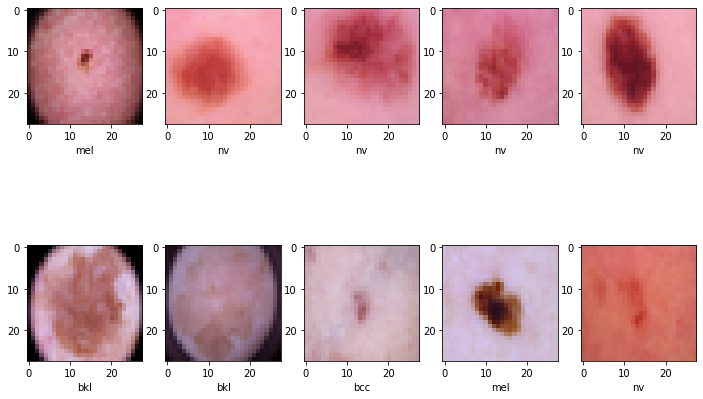

In [6]:
plt.figure(figsize=(12,8))
for i in range(1,11):
    plt.subplot(2,5,i)
    idx = np.random.randint(0,5000)
    plt.imshow(np.array(df)[idx][:-1].reshape(28,28,3), interpolation='nearest')
    plt.xlabel(classes[np.array(df)[idx][-1]][0])

In [7]:
X_train,X_test,y_train,y_test = SplitData(df)

In [8]:
y_train_arg = torch.argmax(y_train,dim=1).numpy()
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train_arg),y=y_train_arg)
class_weights = torch.from_numpy(class_weights)

## ANN

In [9]:
ann_model = nn.Sequential(
    nn.Linear(28*28*3,128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,7)
)
optimizer2 = torch.optim.Adam(ann_model.parameters(),lr=1e-3)
criterion2 = torch.nn.CrossEntropyLoss(weight=class_weights)

In [10]:
# FitModel(X_train,X_test,y_train,y_test,
#          model=ann_model,
#          criterion=criterion2,
#          optimizer=optimizer2,
#          epoch=20,
#          batch_size=64)

## CNN

In [23]:
cnn_model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(p=0.5),
    nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(p=0.5),
    nn.Flatten(1),
    nn.Linear(1024,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(32,7)



)
optimizer = torch.optim.Adam(cnn_model.parameters(),lr=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)


In [29]:
FitModel(X_train.view(-1,3,28,28),X_test.view(-1,3,28,28),y_train,y_test,
         model=cnn_model,
         criterion=criterion,
         optimizer=optimizer,
         epoch=200,
         batch_size=32)

EPOCH     0 | LOSS: 0.9310 | TRAIN ACC: 51.02% | TEST ACC: 45.98% |
EPOCH     1 | LOSS: 0.9012 | TRAIN ACC: 53.34% | TEST ACC: 47.93% |
EPOCH     2 | LOSS: 0.9264 | TRAIN ACC: 52.48% | TEST ACC: 47.78% |
EPOCH     3 | LOSS: 0.9012 | TRAIN ACC: 55.64% | TEST ACC: 50.22% |
EPOCH     4 | LOSS: 0.9035 | TRAIN ACC: 54.77% | TEST ACC: 48.83% |
EPOCH     5 | LOSS: 0.9198 | TRAIN ACC: 53.78% | TEST ACC: 48.33% |
EPOCH     6 | LOSS: 0.9067 | TRAIN ACC: 52.43% | TEST ACC: 47.68% |
EPOCH     7 | LOSS: 0.8916 | TRAIN ACC: 52.98% | TEST ACC: 47.28% |
EPOCH     8 | LOSS: 0.8806 | TRAIN ACC: 54.43% | TEST ACC: 49.93% |
EPOCH     9 | LOSS: 0.8815 | TRAIN ACC: 53.41% | TEST ACC: 48.48% |
EPOCH    10 | LOSS: 0.8888 | TRAIN ACC: 53.02% | TEST ACC: 46.43% |
EPOCH    11 | LOSS: 0.8870 | TRAIN ACC: 52.95% | TEST ACC: 46.93% |
EPOCH    12 | LOSS: 0.8696 | TRAIN ACC: 54.29% | TEST ACC: 48.83% |
EPOCH    13 | LOSS: 0.8977 | TRAIN ACC: 54.78% | TEST ACC: 48.83% |
EPOCH    14 | LOSS: 0.9039 | TRAIN ACC: 54.39% |

In [25]:
arg_test = torch.argmax(y_test,dim=1).numpy()

In [26]:
a = np.bincount(arg_test)

In [27]:
max(a) / sum(a)

0.6694957563654518

In [28]:
y_test_pred  = cnn_model.forward(X_test.view(-1,3,28,28))
a = torch.argmax(y_test_pred,dim=1).numpy()
np.bincount(a)


array([159, 154, 209,  62, 695,  74, 650], dtype=int64)